In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
from google.colab import files
uploaded = files.upload()

Saving Alphabets_data.csv to Alphabets_data.csv


In [3]:
data = pd.read_csv('Alphabets_data.csv')
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
data_copy=data.copy()

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_copy['letter'] = le.fit_transform(data_copy['letter'])

In [6]:
data_copy.corr()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
letter,1.000000,0.105349,0.001547,0.096817,0.041672,-0.002665,-0.049637,0.308919,-0.109954,0.012275,-0.077303,0.389421,-0.140922,0.095885,0.336885,-0.056578,-0.183466
xbox,0.105349,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.001547,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.096817,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.041672,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,-0.002665,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.049637,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.308919,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,-0.109954,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.012275,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335


In [7]:
data.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


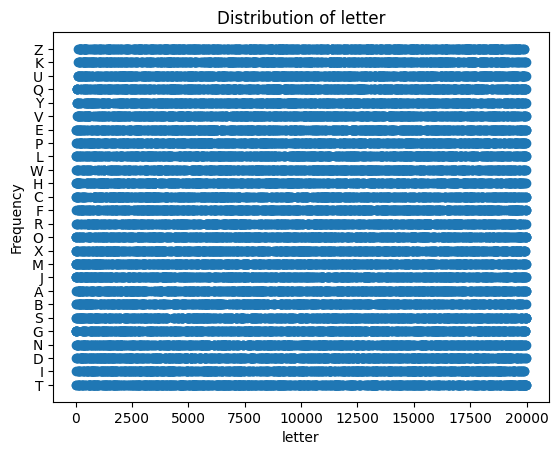

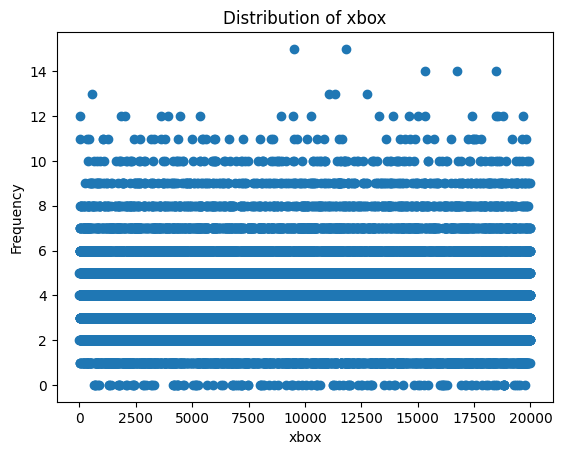

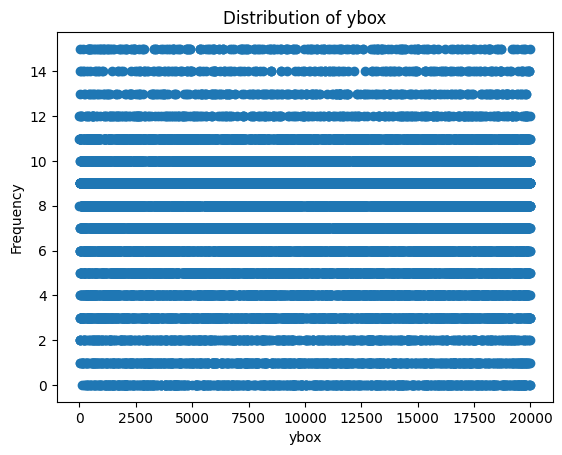

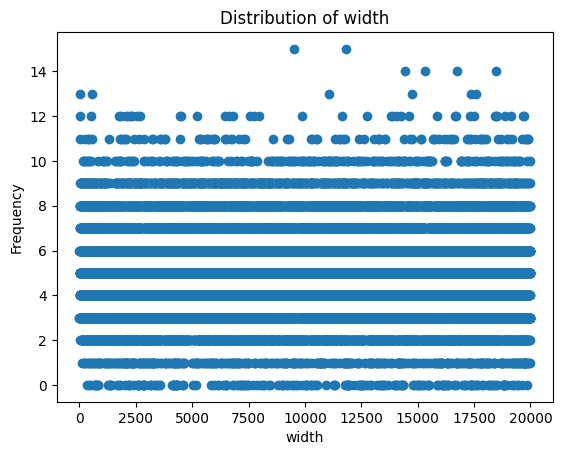

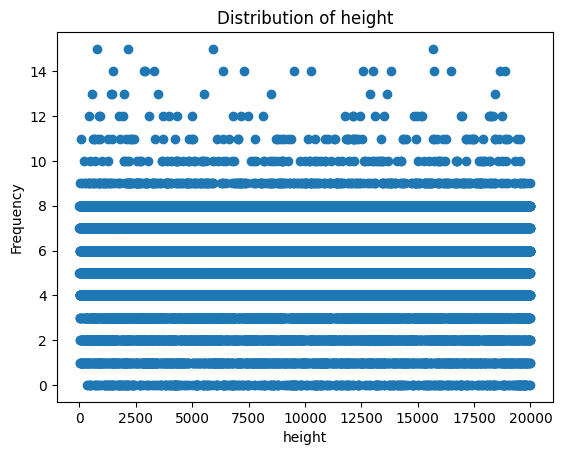

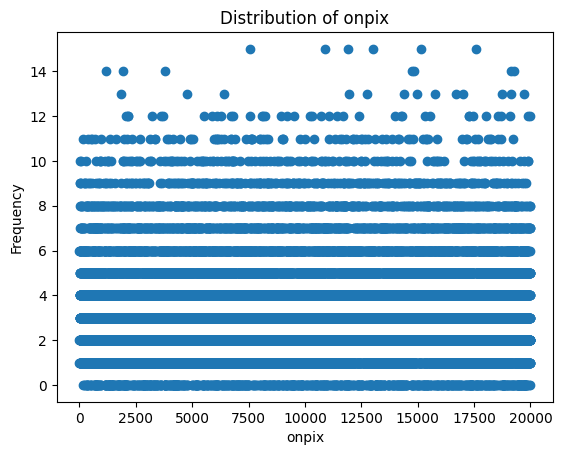

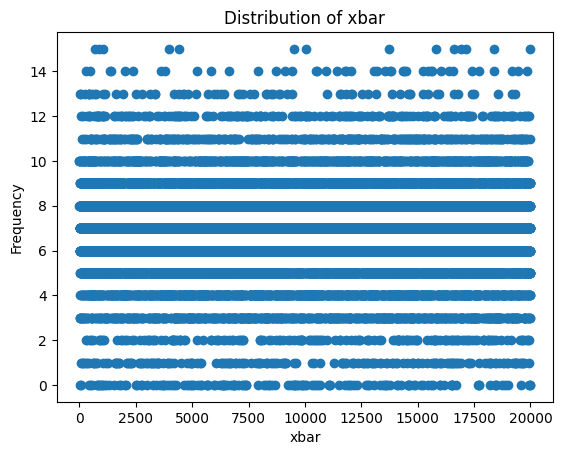

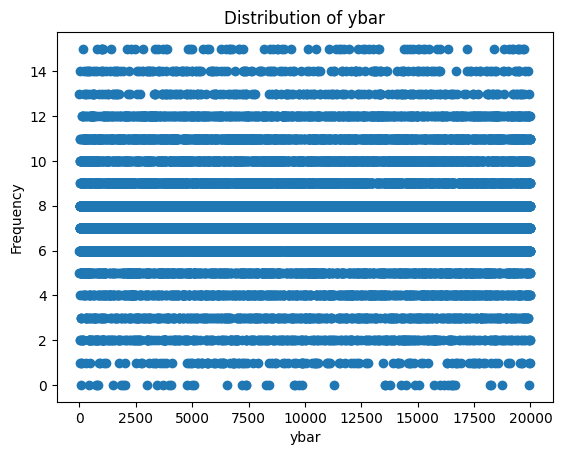

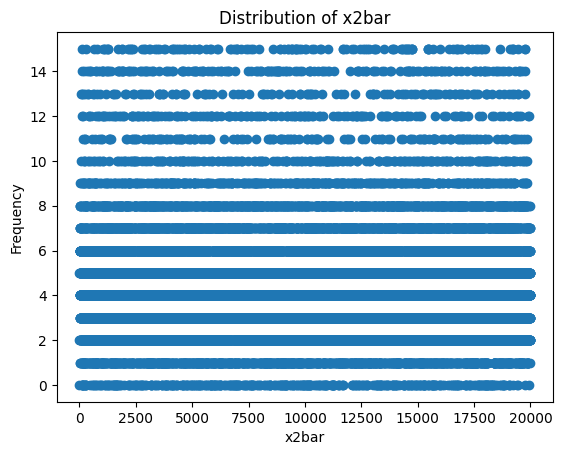

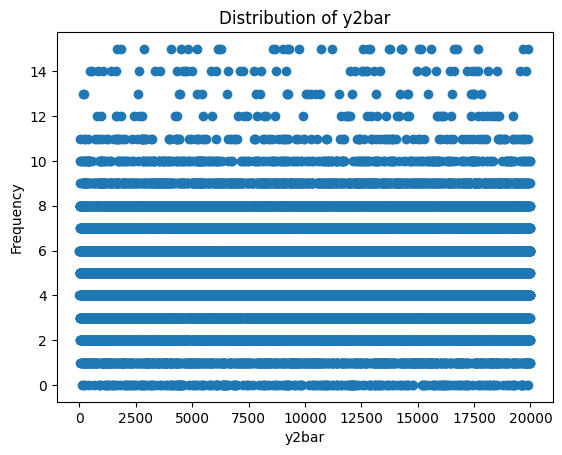

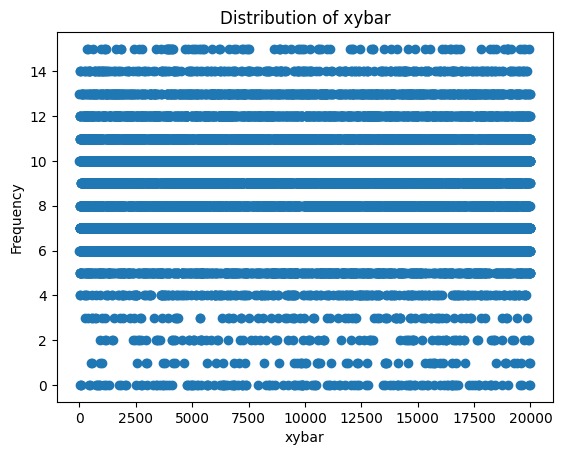

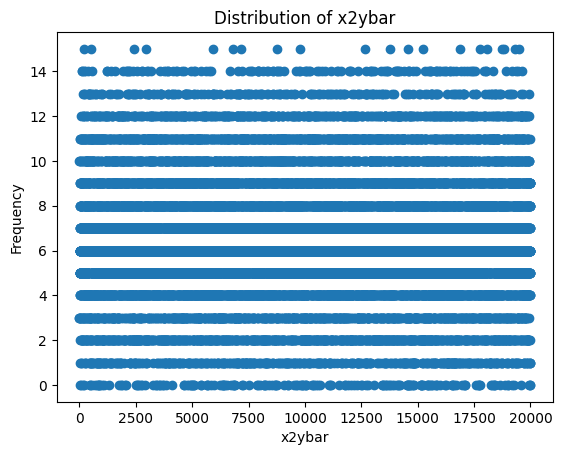

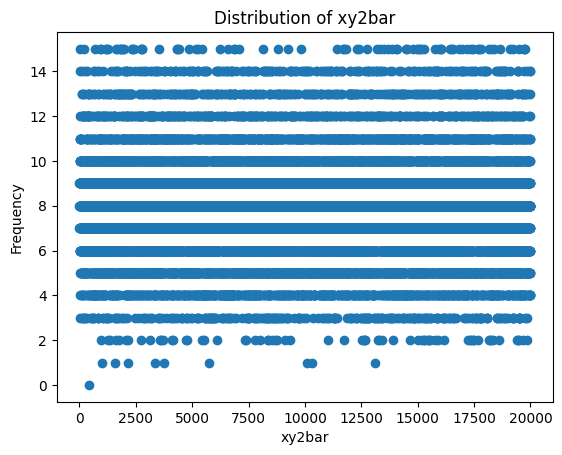

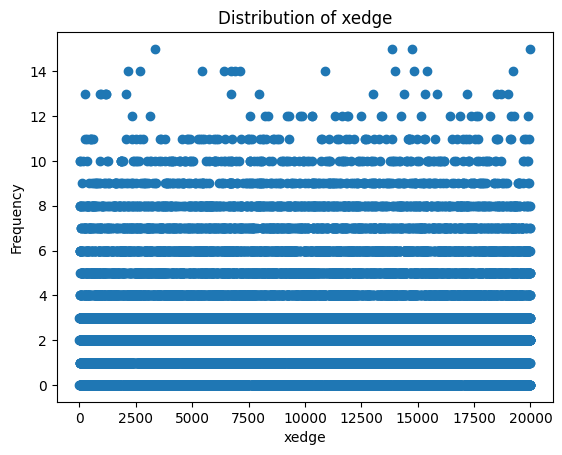

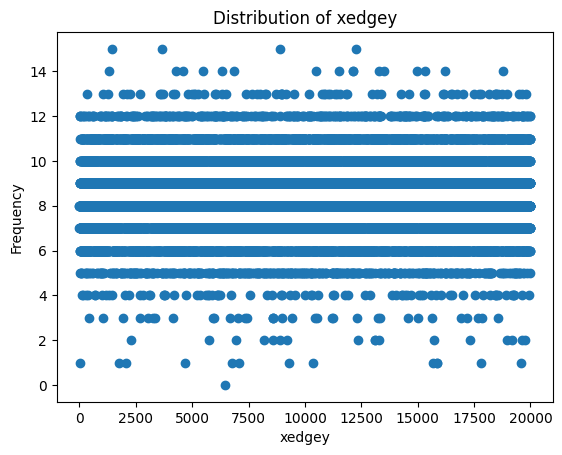

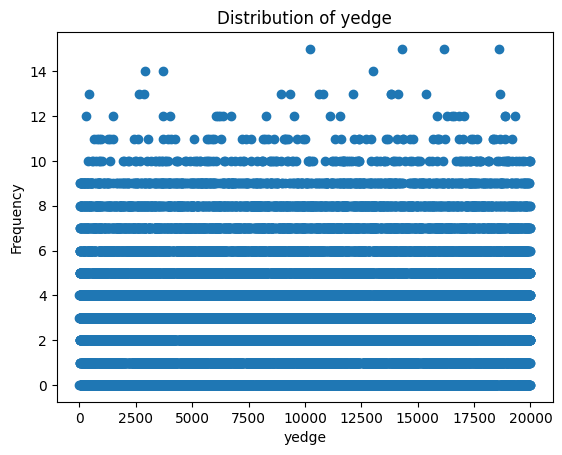

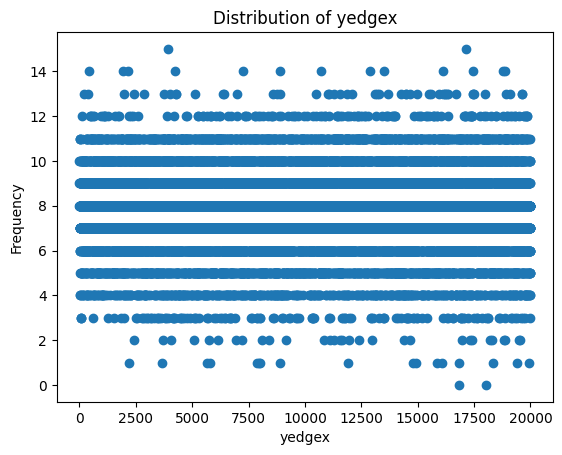

In [8]:


for col in data.columns:
    plt.scatter(data.index, data[col]) # Use plt.scatter instead of plt.scatterplot
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

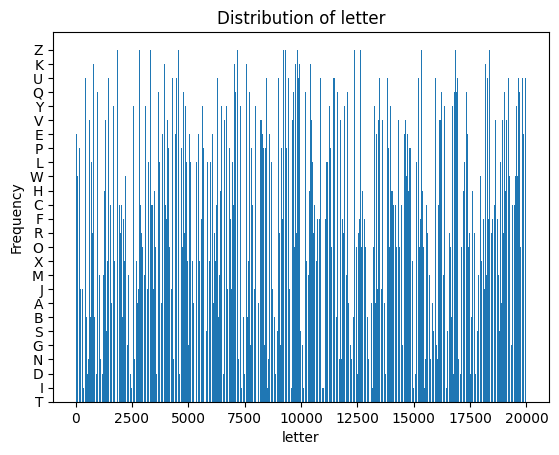

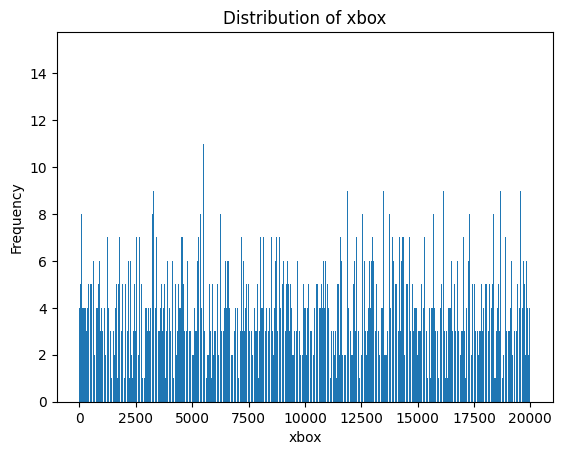

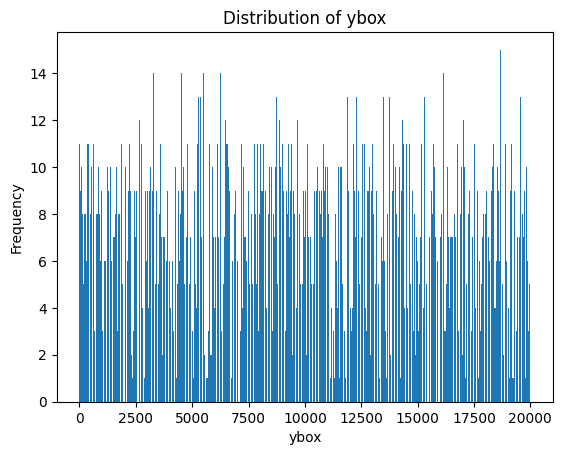

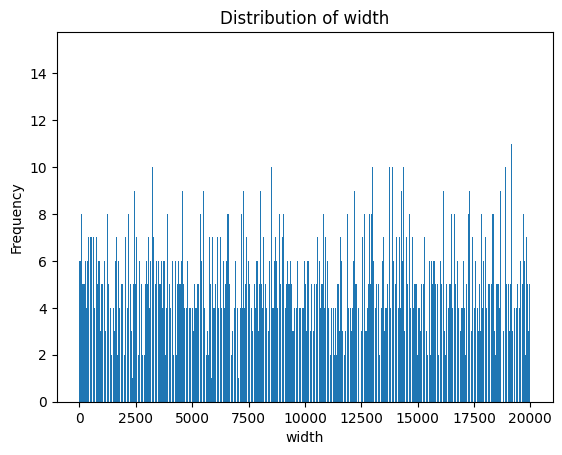

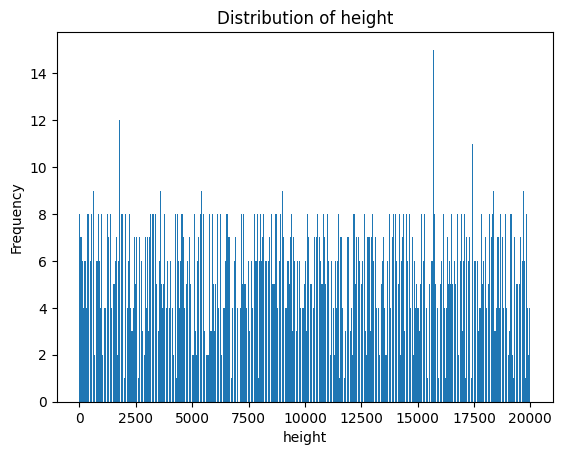

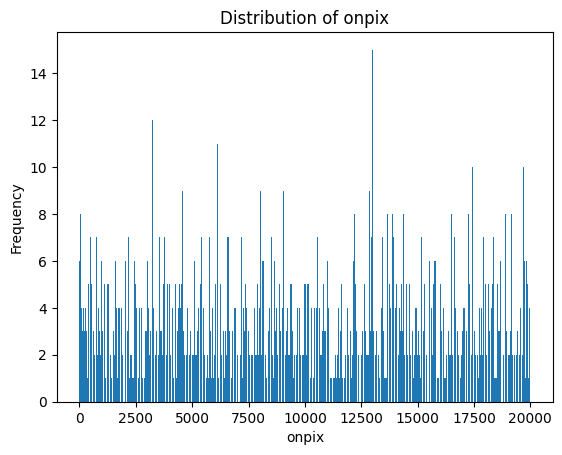

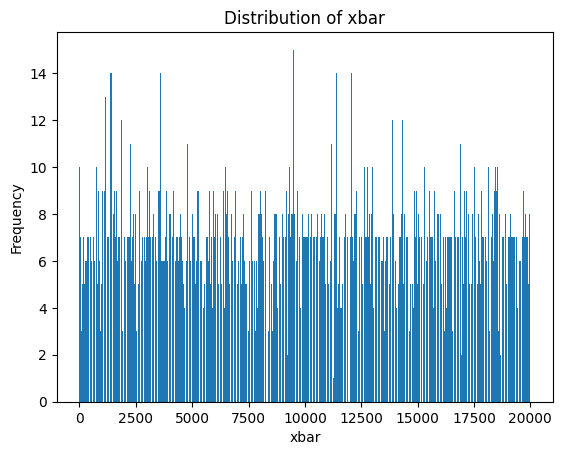

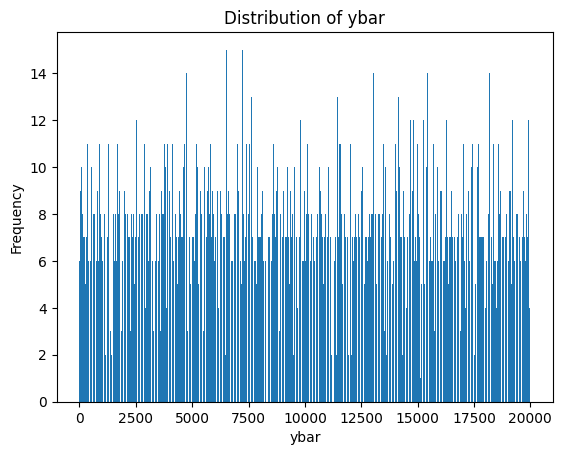

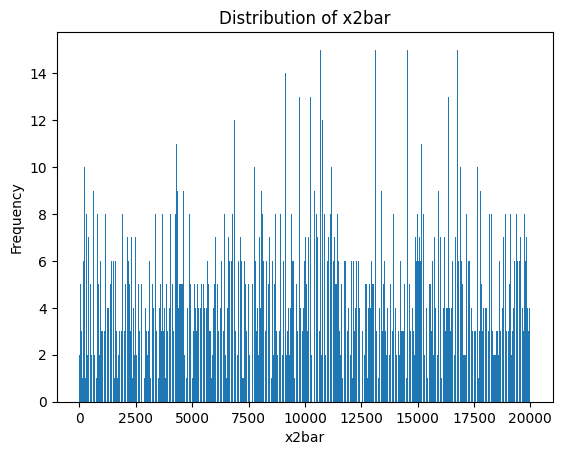

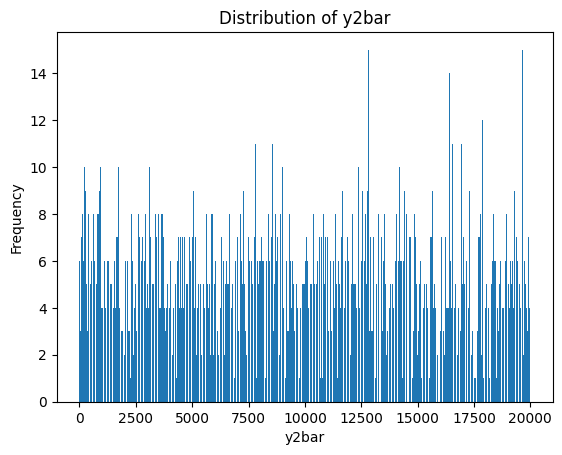

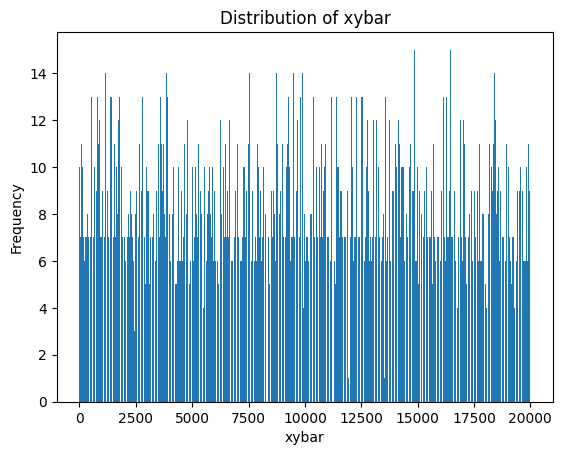

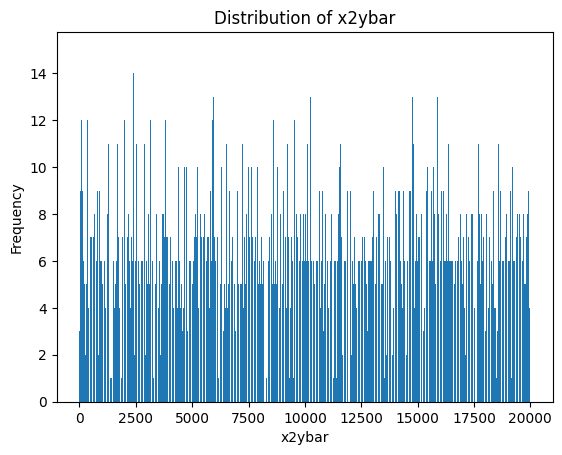

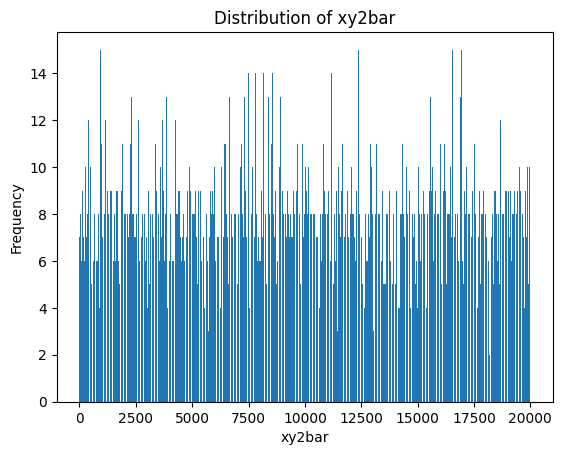

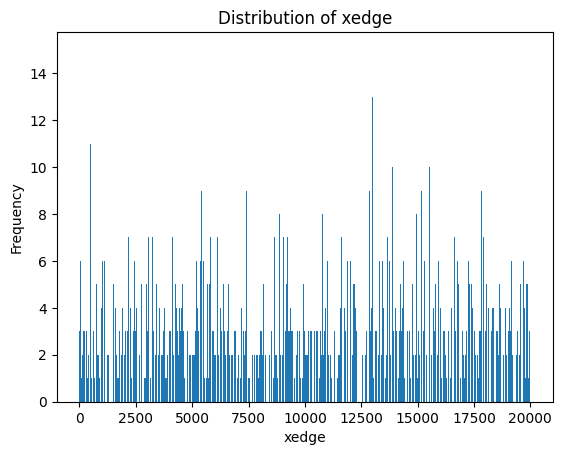

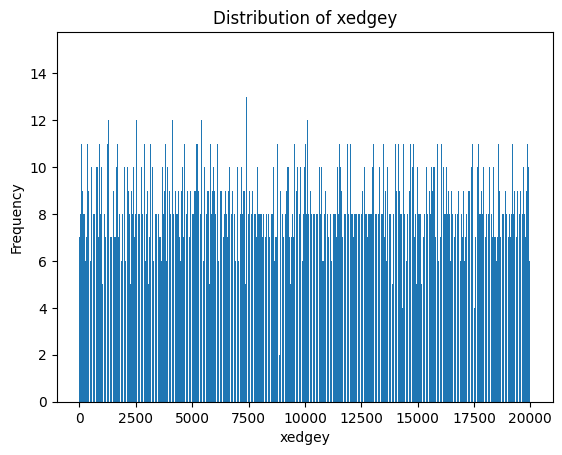

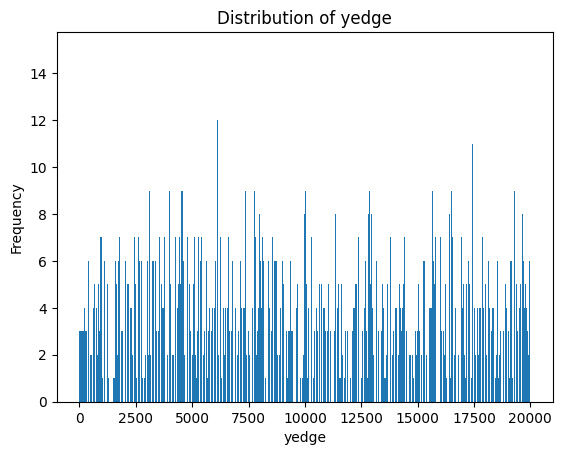

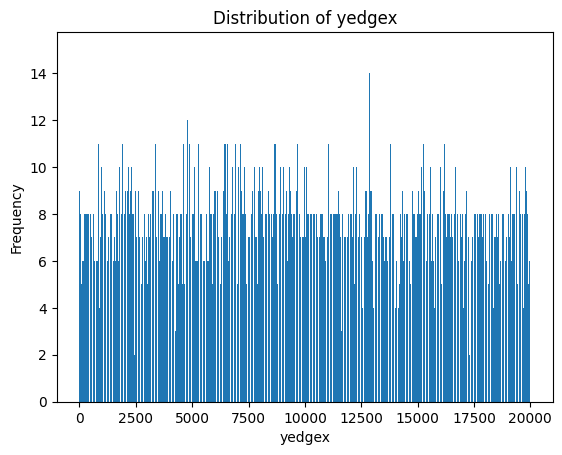

In [9]:
import matplotlib.pyplot as plt

for col in data.columns:
    plt.bar(data.index, data[col]) # Use plt.scatter instead of plt.scatterplot
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()

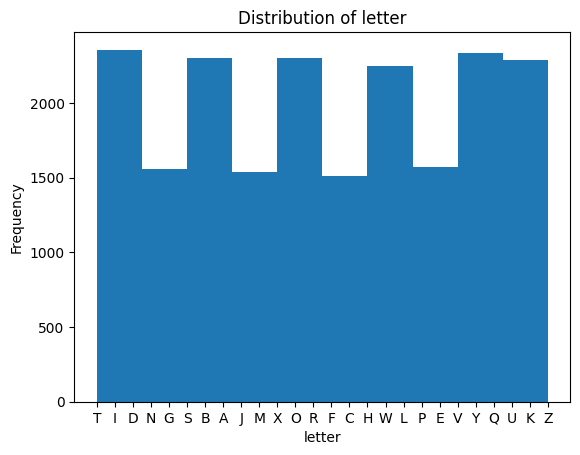

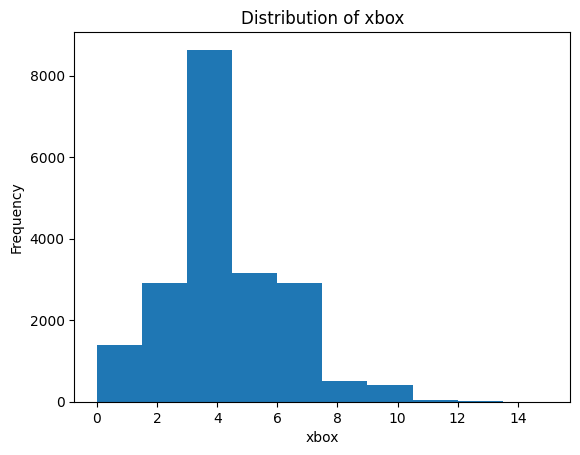

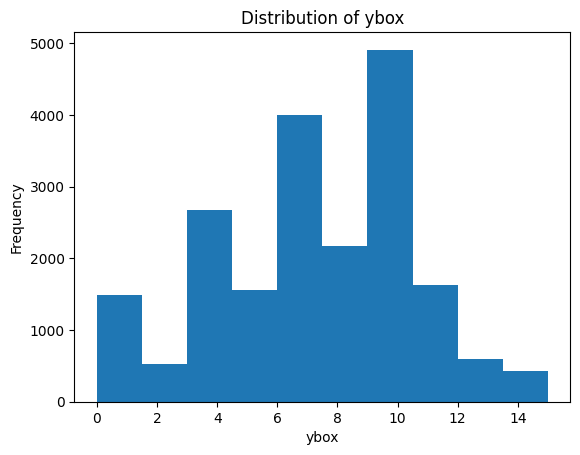

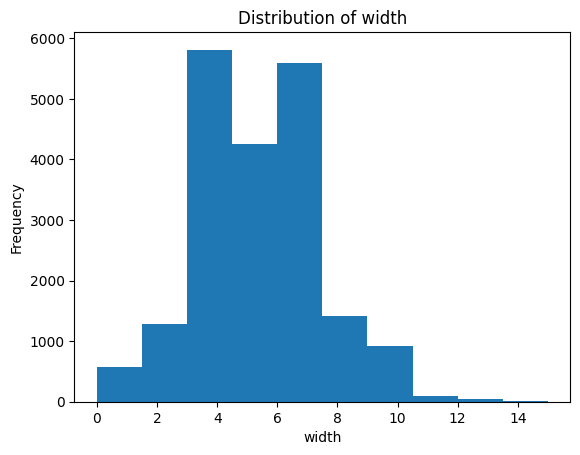

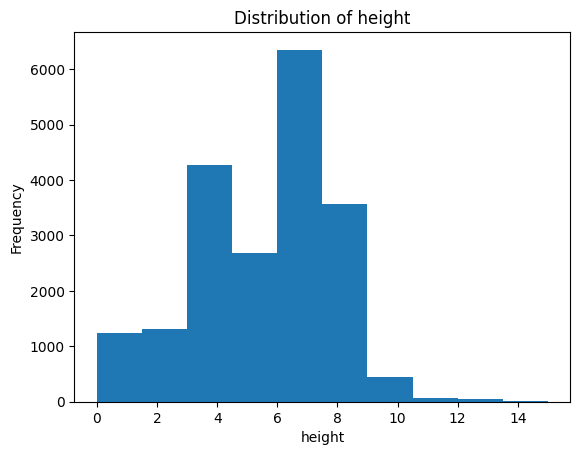

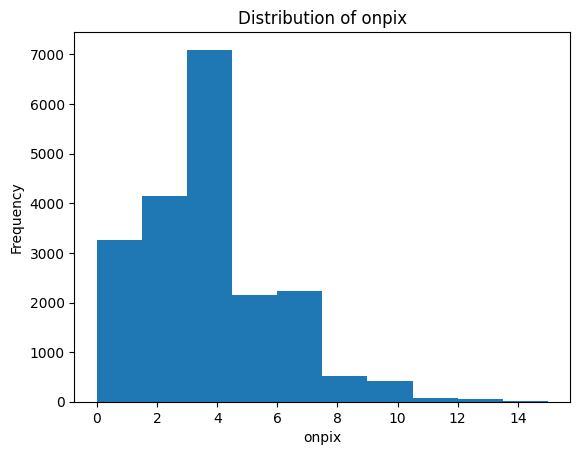

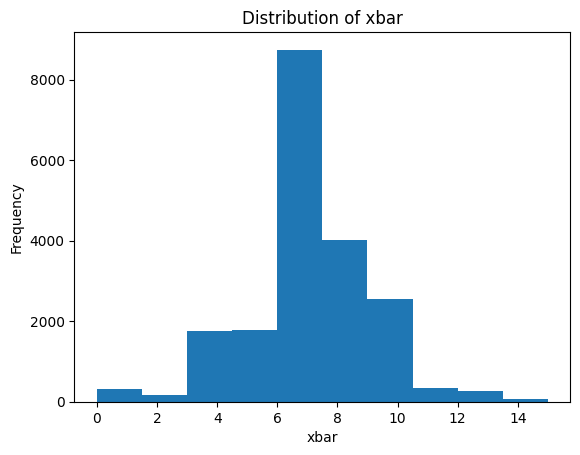

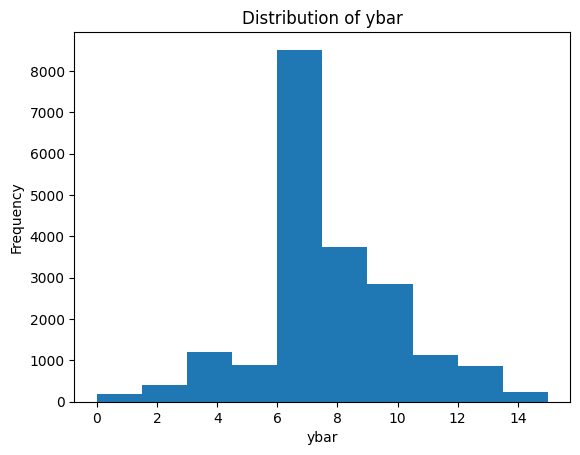

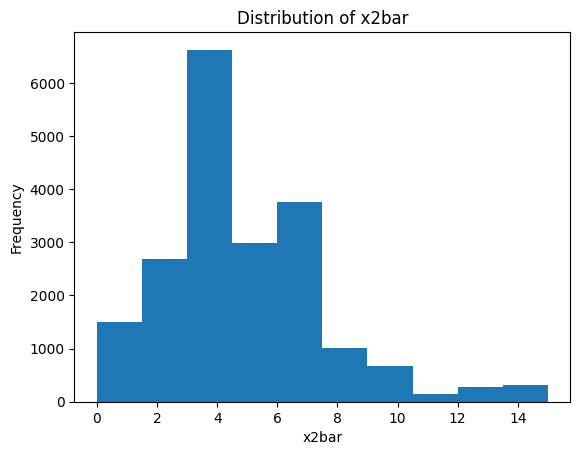

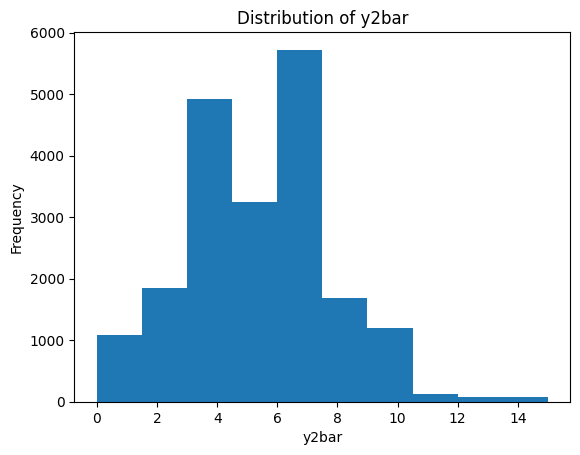

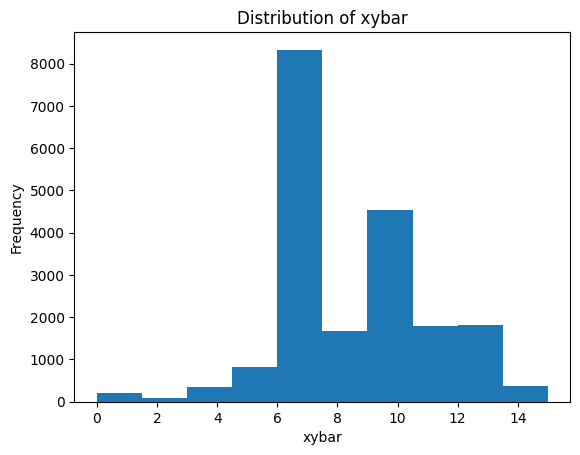

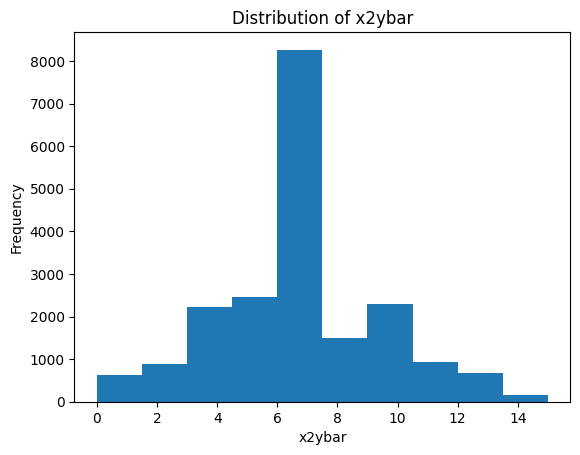

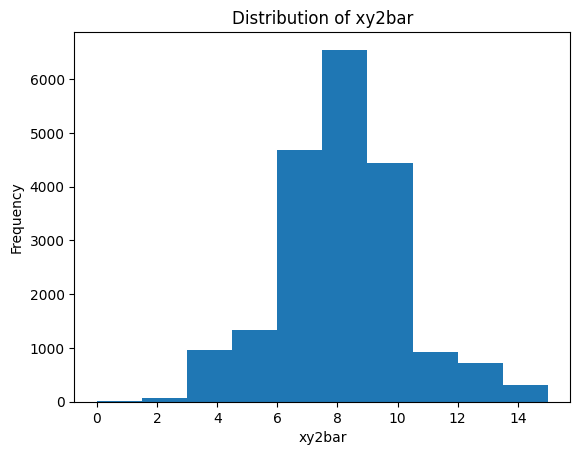

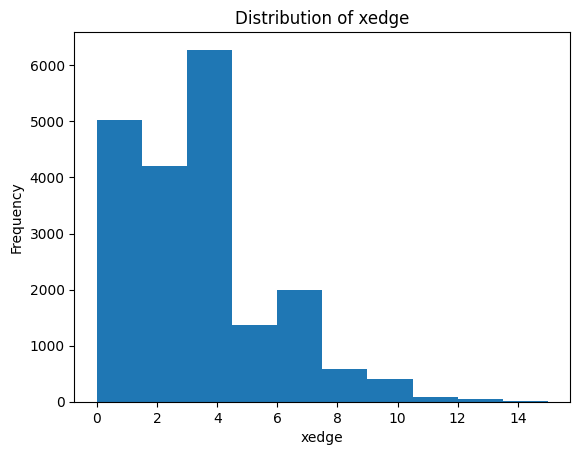

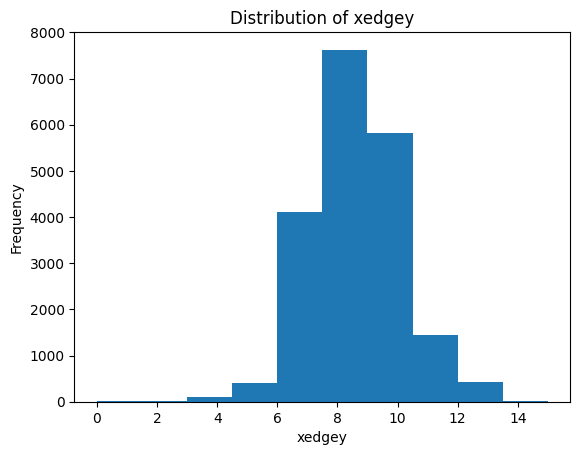

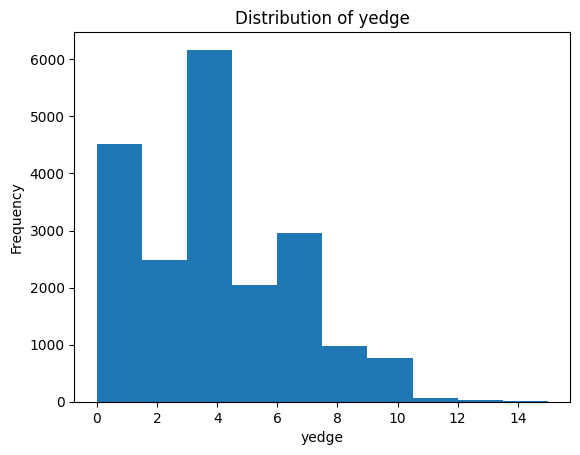

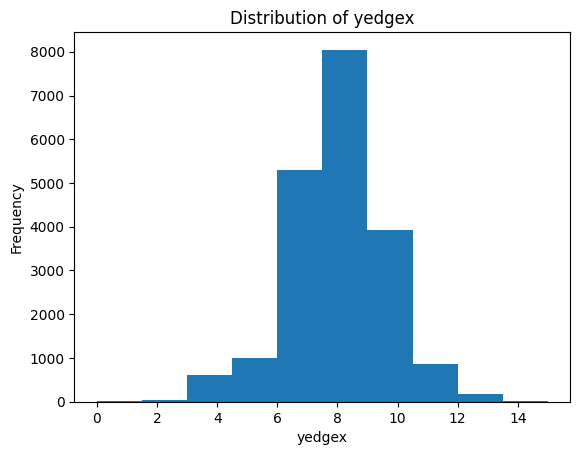

In [10]:
for col in data.columns:
    plt.hist(data[col])
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


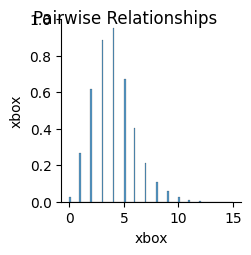

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ["letter", "xbox"]  # Replace with actual column names
sns.pairplot(data[selected_features])
plt.suptitle("Pairwise Relationships")
plt.show()

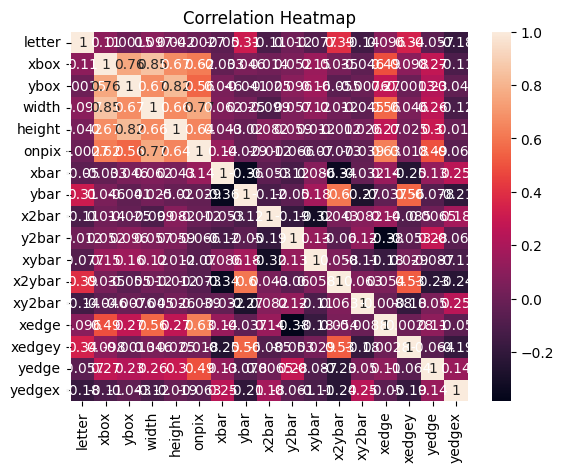

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = data_copy.corr()
sns.heatmap(correlation, annot=True) # Use sns.heatmap
plt.title("Correlation Heatmap")
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_copy)

# Combine normalized data with labels
data_preprocessed = np.hstack((data.iloc[:, 0].values.reshape(-1, 1), data_normalized))

In [14]:
data_preprocessed

array([['T', 0.8642042962526815, -1.0576982957256178, ...,
        -0.21908162939303566, -1.4381526966217852, 0.12291106712560491],
       ['I', -0.6020737678015347, 0.5103849674390448, ...,
        -0.21908162939303566, 0.12008141632929248, 1.3594409174838014],
       ['D', -1.2685637969170873, -0.012309453615842696, ...,
        -0.8656262048483556, -0.26947711190847695, 0.7411759923047031],
       ...,
       ['T', 0.8642042962526815, 1.0330793884939324, ...,
        2.3670966724282443, -0.6590356401462464, -2.3501486335907877],
       ['S', 0.730906290429571, -1.0576982957256178, ...,
        0.4274629460622843, 0.509639944567062, 0.12291106712560491],
       ['A', -1.668457814386419, -0.012309453615842696, ...,
        -0.8656262048483556, -0.6590356401462464, 0.12291106712560491]],
      dtype=object)

In [15]:
X = data_preprocessed[:, 1:]
y = (data.iloc[:, 0]).values

In [16]:
X

array([[0.8642042962526815, -1.0576982957256178, 0.2918771286306274, ...,
        -0.21908162939303566, -1.4381526966217852, 0.12291106712560491],
       [-0.6020737678015347, 0.5103849674390448, 1.5023577035632447, ...,
        -0.21908162939303566, 0.12008141632929248, 1.3594409174838014],
       [-1.2685637969170873, -0.012309453615842696, 1.1997375598300903,
        ..., -0.8656262048483556, -0.26947711190847695,
        0.7411759923047031],
       ...,
       [0.8642042962526815, 1.0330793884939324, 0.5944972723637817, ...,
        2.3670966724282443, -0.6590356401462464, -2.3501486335907877],
       [0.730906290429571, -1.0576982957256178, -1.2212235900351442, ...,
        0.4274629460622843, 0.509639944567062, 0.12291106712560491],
       [-1.668457814386419, -0.012309453615842696, 0.5944972723637817,
        ..., -0.8656262048483556, -0.6590356401462464,
        0.12291106712560491]], dtype=object)

In [17]:
y

array(['T', 'I', 'D', ..., 'T', 'S', 'A'], dtype=object)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16000, 17), (4000, 17), (16000,), (4000,))

In [19]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=17, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
y_train

array(['E', 'E', 'N', ..., 'X', 'I', 'J'], dtype=object)

In [22]:
y_test

array(['T', 'L', 'A', ..., 'Q', 'Y', 'Y'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [24]:
y_train

array([ 4,  4, 13, ..., 23,  8,  9])

In [25]:
y_test

array([19, 11,  0, ..., 16, 24, 24])

In [26]:
import tensorflow as tf
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)

y_train_1d = tf.squeeze(y_train)
#
num_classes = len(np.unique(y_train_1d))
y_train_encoded = tf.keras.utils.to_categorical(y_train_1d, num_classes=num_classes)

model = tf.keras.models.Sequential([

    tf.keras.layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1356 - loss: 3.1232 - val_accuracy: 0.4241 - val_loss: 2.2459
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4877 - loss: 2.0748 - val_accuracy: 0.6344 - val_loss: 1.7069
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6612 - loss: 1.6083 - val_accuracy: 0.7153 - val_loss: 1.4275
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7250 - loss: 1.3633 - val_accuracy: 0.7478 - val_loss: 1.2555
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7556 - loss: 1.2056 - val_accuracy: 0.7700 - val_loss: 1.1371
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7688 - loss: 1.1086 - val_accuracy: 0.7819 - val_loss: 1.0510
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7977 - loss: 0.9959 - val_accuracy: 0.7925 - val_loss: 0.9838
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7973 - loss: 0.9497 - val_accuracy: 0.

In [27]:
!pip install tensorflow

In [28]:
!pip install tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.3.1 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [29]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [30]:
!pip install tensorflow keras

In [31]:

def create_model(optimizer='adam', activation='relu', neurons=64):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train.shape[1],), activation=activation))
    model.add(Dense(neurons // 2, activation=activation))
    if len(y_train.shape) == 1:
        model.add(Dense(1, activation='softmax'))
    else:
        model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model2 = create_model(optimizer='adam', activation='relu', neurons=64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model2.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0373 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0372 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0391 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0384 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0370 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0411 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 7/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0395 - loss: 0.0000e+00 - val_accuracy: 0.0431 - val_loss: 0.0000e+00
Epoch 8/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accur

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)

y_pred = model2.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

y_test_labels = y_test

accuracy = accuracy_score(y_test_labels, y_pred_labels)
precision = precision_score(y_test_labels, y_pred_labels, average='weighted')
recall = recall_score(y_test_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy: 0.03725
Precision: 0.0013875625000000001
Recall: 0.03725
F1-score: 0.002675463967221017


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
